## Import libraries

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from random import randint

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Import data

In [2]:
# Train data
data_train = pd.read_json('./data/train.json')
data_train['inc_angle'] = pd.to_numeric(data_train['inc_angle'], errors='coerce')

In [3]:
data_train[data_train["is_iceberg"] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 2 to 1508
Data columns (total 5 columns):
band_1        753 non-null object
band_2        753 non-null object
id            753 non-null object
inc_angle     753 non-null float64
is_iceberg    753 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 35.3+ KB


In [4]:
data_train[data_train["is_iceberg"] == 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 851 entries, 0 to 1603
Data columns (total 5 columns):
band_1        851 non-null object
band_2        851 non-null object
id            851 non-null object
inc_angle     718 non-null float64
is_iceberg    851 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.9+ KB


In [5]:
data_train["inc_angle"] = data_train["inc_angle"].fillna(
                                np.mean(data_train.loc[data_train['is_iceberg'] == 0, "inc_angle"]))

In [6]:
data_train.head(5)

band_1  \
0  [-27.878360999999998, -27.15416, -28.668615, -...   
1  [-12.242375, -14.920304999999999, -14.920363, ...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id  inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913    43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd    38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0    45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18    43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4    35.6256   

   is_iceberg  
0           0  
1           0  
2           1  
3           0  
4           0

## Data exploration

In [7]:
# Plot two channels of 3 random images
def plot_random_images(data, is_iceberg):
    if is_iceberg: 
        obj_names = "Icebergs"
    else:
        obj_names = "Ships"
    plt.rcParams["axes.grid"] = False
    fig, axes = plt.subplots(3,2, figsize=(10, 8))
    fig.suptitle(obj_names, fontsize=30)
    for i in range(3):
        k = randint(1, 100)
        for j in range(2):
            ax = axes[i,j]
            arr = np.reshape(np.array(data[data.is_iceberg == 1].iloc[k, j]), (75, 75))
            ax.imshow(arr, cmap='gray')
            if i == 0 and j == 0:
                ax.set_title("HH", loc='center', fontsize=24)
            if i == 0 and j == 1:
                ax.set_title("HV", loc='center', fontsize=24)
    plt.show()

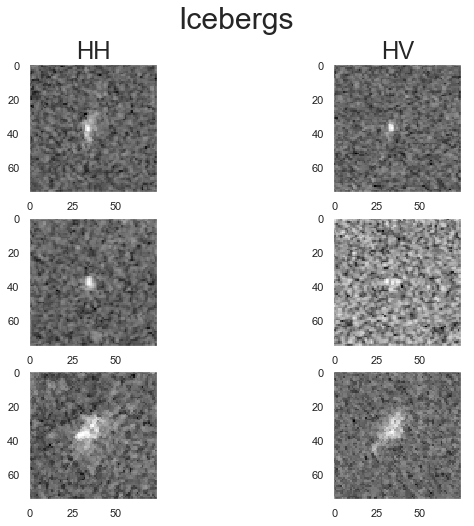

In [8]:
plot_random_images(data_train, 1)

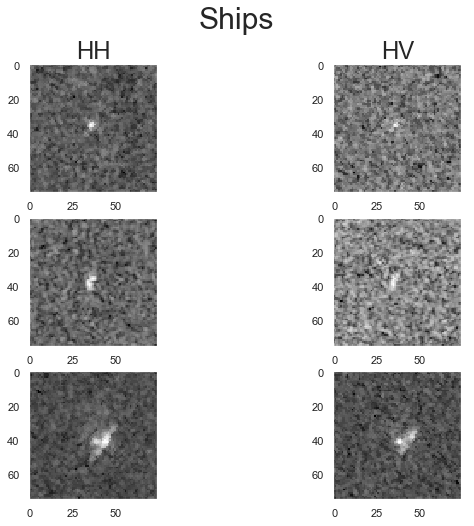

In [9]:
plot_random_images(data_train, 0)

In [10]:
def get_stats(data, band_number=1):
    band = 'band_'+str(band_number)
    data['max_'+str(band_number)] = [np.max(np.array(x)) for x in data[band]]
    data['min_'+str(band_number)] = [np.min(np.array(x)) for x in data[band]]
    data['med_'+str(band_number)] = [np.median(np.array(x)) for x in data[band]]
    data['std_'+str(band_number)] = [np.std(np.array(x)) for x in data[band]]
    data['mean_'+str(band_number)] = [np.mean(np.array(x)) for x in data[band]]
    data['percentile25_' + str(band_number)] = [np.percentile(np.array(x), 25) for x in data[band]]
    data['percentile75_' + str(band_number)] = [np.percentile(np.array(x), 75) for x in data[band]]
    data['mid50_'+str(band_number)] = data['percentile75_' +  str(band_number)]-data['percentile25_'+str(band_number)]
    return data

data_train = get_stats(data_train, 1)
data_train = get_stats(data_train, 2)

In [11]:
def plot_single_stats(name, nbins, data, show=True):
    minval = data[name].min()
    maxval = data[name].max()
    plt.hist(data.loc[data_train.is_iceberg == 1, name], range=[minval, maxval],
             bins=nbins, color='blue', alpha=0.5, label='Iceberg')
    plt.hist(data.loc[data_train.is_iceberg == 0, name], range=[minval, maxval],
             bins=nbins, color='black', alpha=0.5, label='Boat')
    plt.legend()
    plt.title(name, fontsize=16)
    plt.xlim([minval, maxval])
    plt.xlabel(name)
    if show:
        plt.show()


def plt_two_bands_stats(name, nbins, data):
    plt.subplots_adjust(left=0, right=1.8, wspace=0.3, top=0.8)
    plt.subplot(121)
    plot_single_stats(name + "1", nbins, data, show=False)
    plt.title("Band 1", fontsize=16)
    plt.subplot(122)
    plot_single_stats(name + "2", nbins, data, show=False)
    plt.title("Band 2", fontsize=16)
    plt.show()

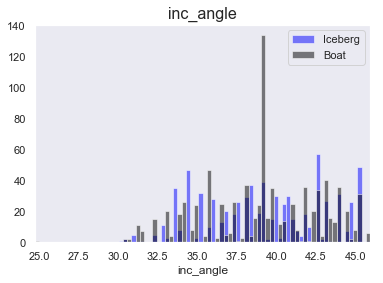

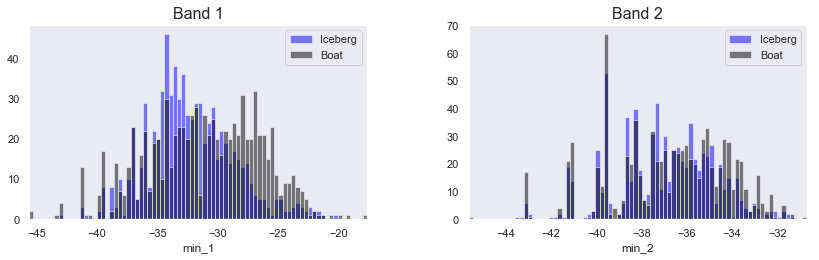

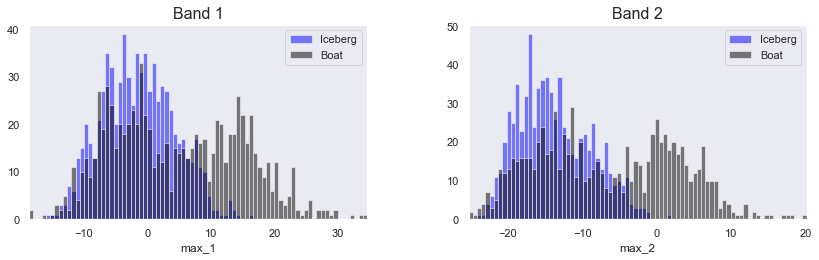

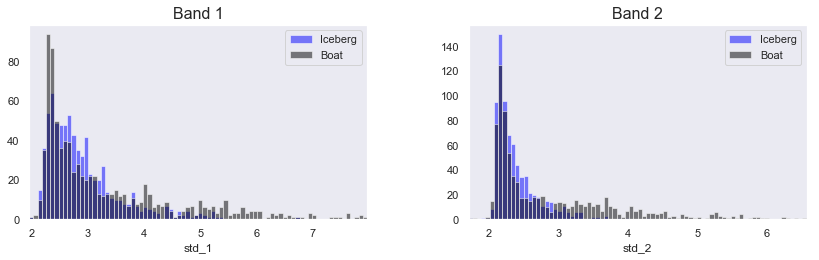

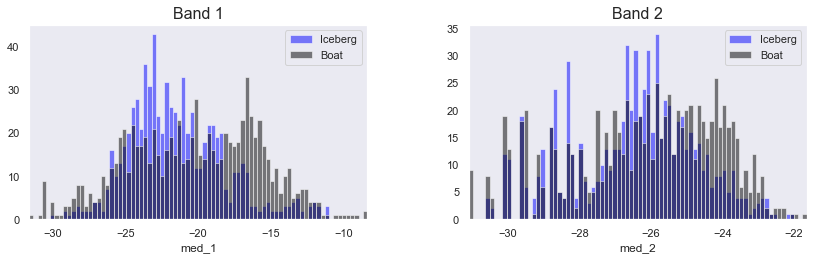

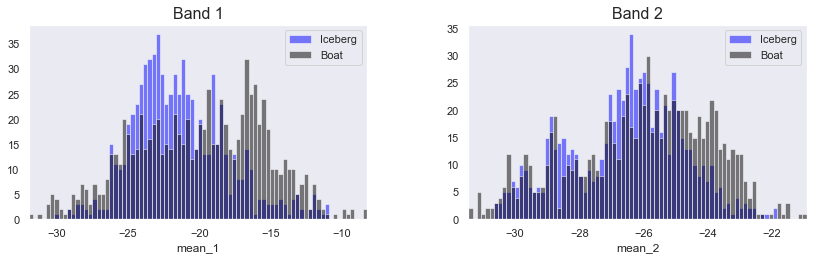

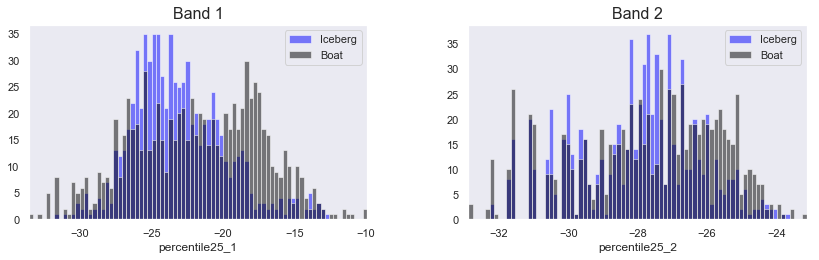

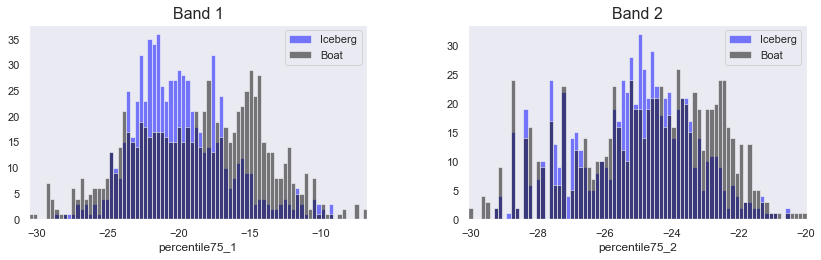

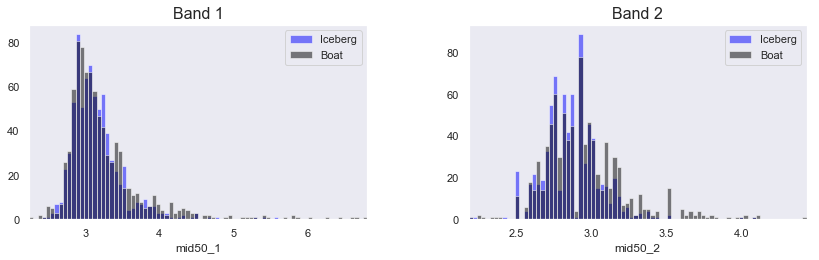

In [12]:
nbins = 80
plot_single_stats("inc_angle", nbins, data_train)

for col in ['min_', 'max_', 'std_', 'med_', 'mean_', 'percentile25_', 'percentile75_', 'mid50_']:
    plt_two_bands_stats(col, nbins, data_train)

In [13]:
data_train.columns

Index(['band_1', 'band_2', 'id', 'inc_angle', 'is_iceberg', 'max_1', 'min_1',
       'med_1', 'std_1', 'mean_1', 'percentile25_1', 'percentile75_1',
       'mid50_1', 'max_2', 'min_2', 'med_2', 'std_2', 'mean_2',
       'percentile25_2', 'percentile75_2', 'mid50_2'],
      dtype='object')

E:\programs\anaconda\envs\ml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


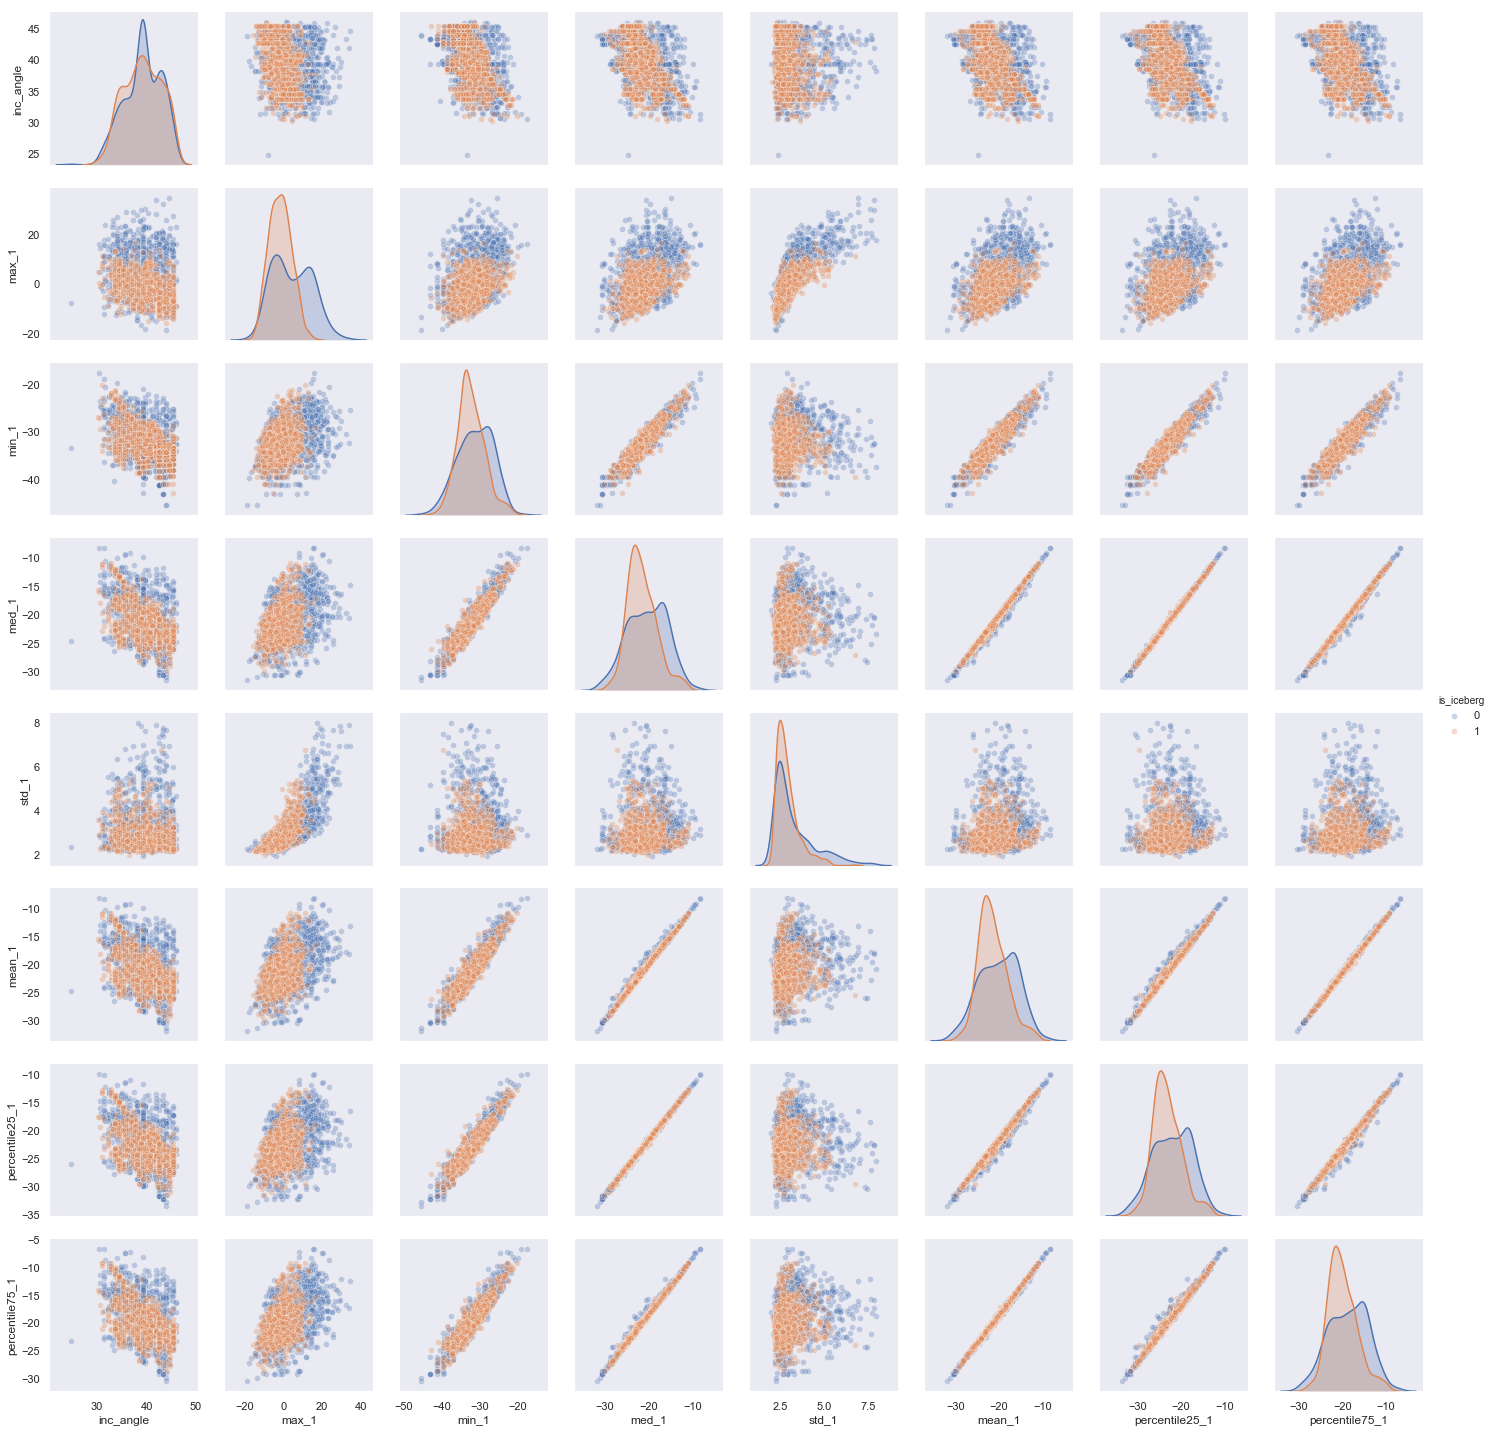

In [14]:
pairplot_cols = ['inc_angle', 'max_1', 'min_1', 'med_1', 'std_1', 'mean_1', 'percentile25_1', 'percentile75_1']
sns.pairplot(hue='is_iceberg', data=data_train[pairplot_cols + ['is_iceberg']], vars=pairplot_cols,
             plot_kws={'alpha': 0.3})

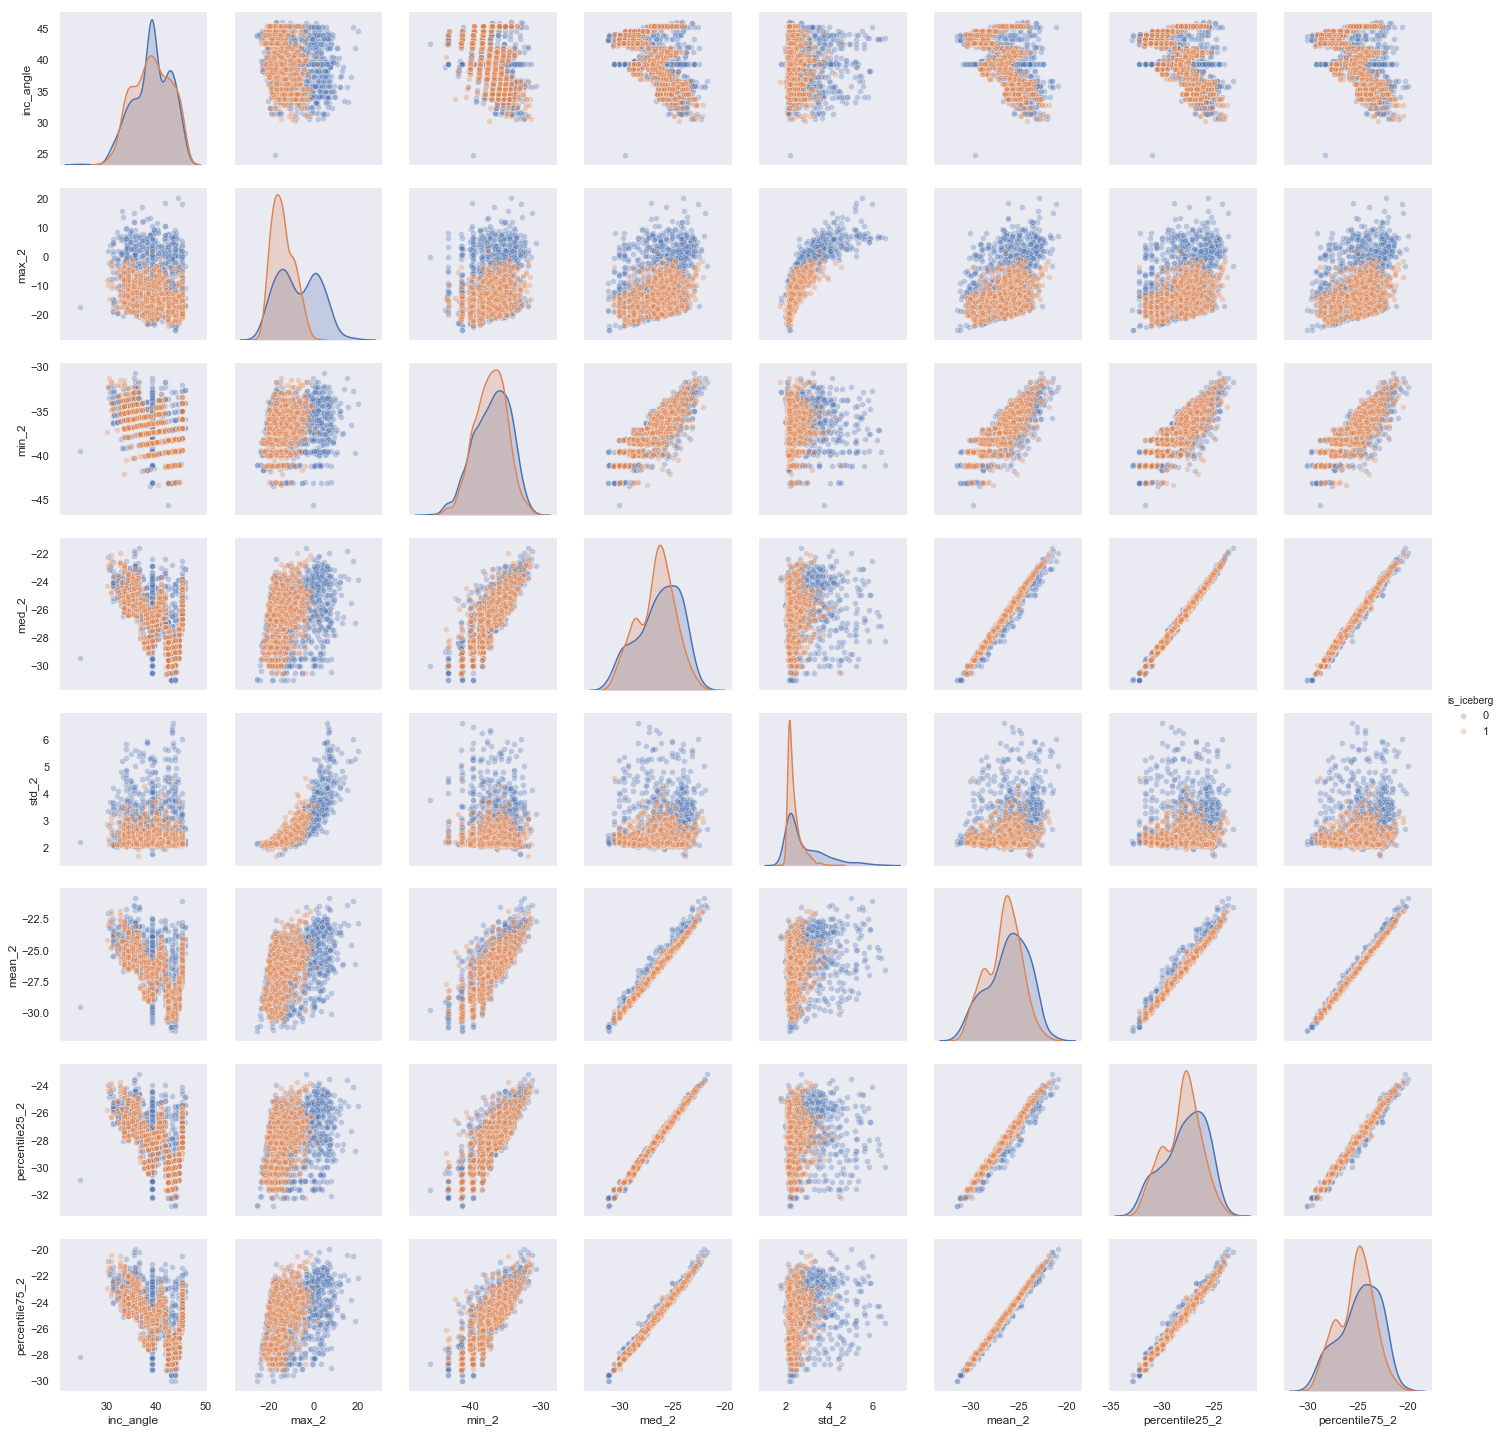

In [15]:
pairplot_cols = ['inc_angle', 'max_2', 'min_2', 'med_2', 'std_2', 'mean_2', 'percentile25_2', 'percentile75_2']
sns.pairplot(hue='is_iceberg', data=data_train[pairplot_cols + ['is_iceberg']], vars=pairplot_cols,
             plot_kws={'alpha': 0.3})

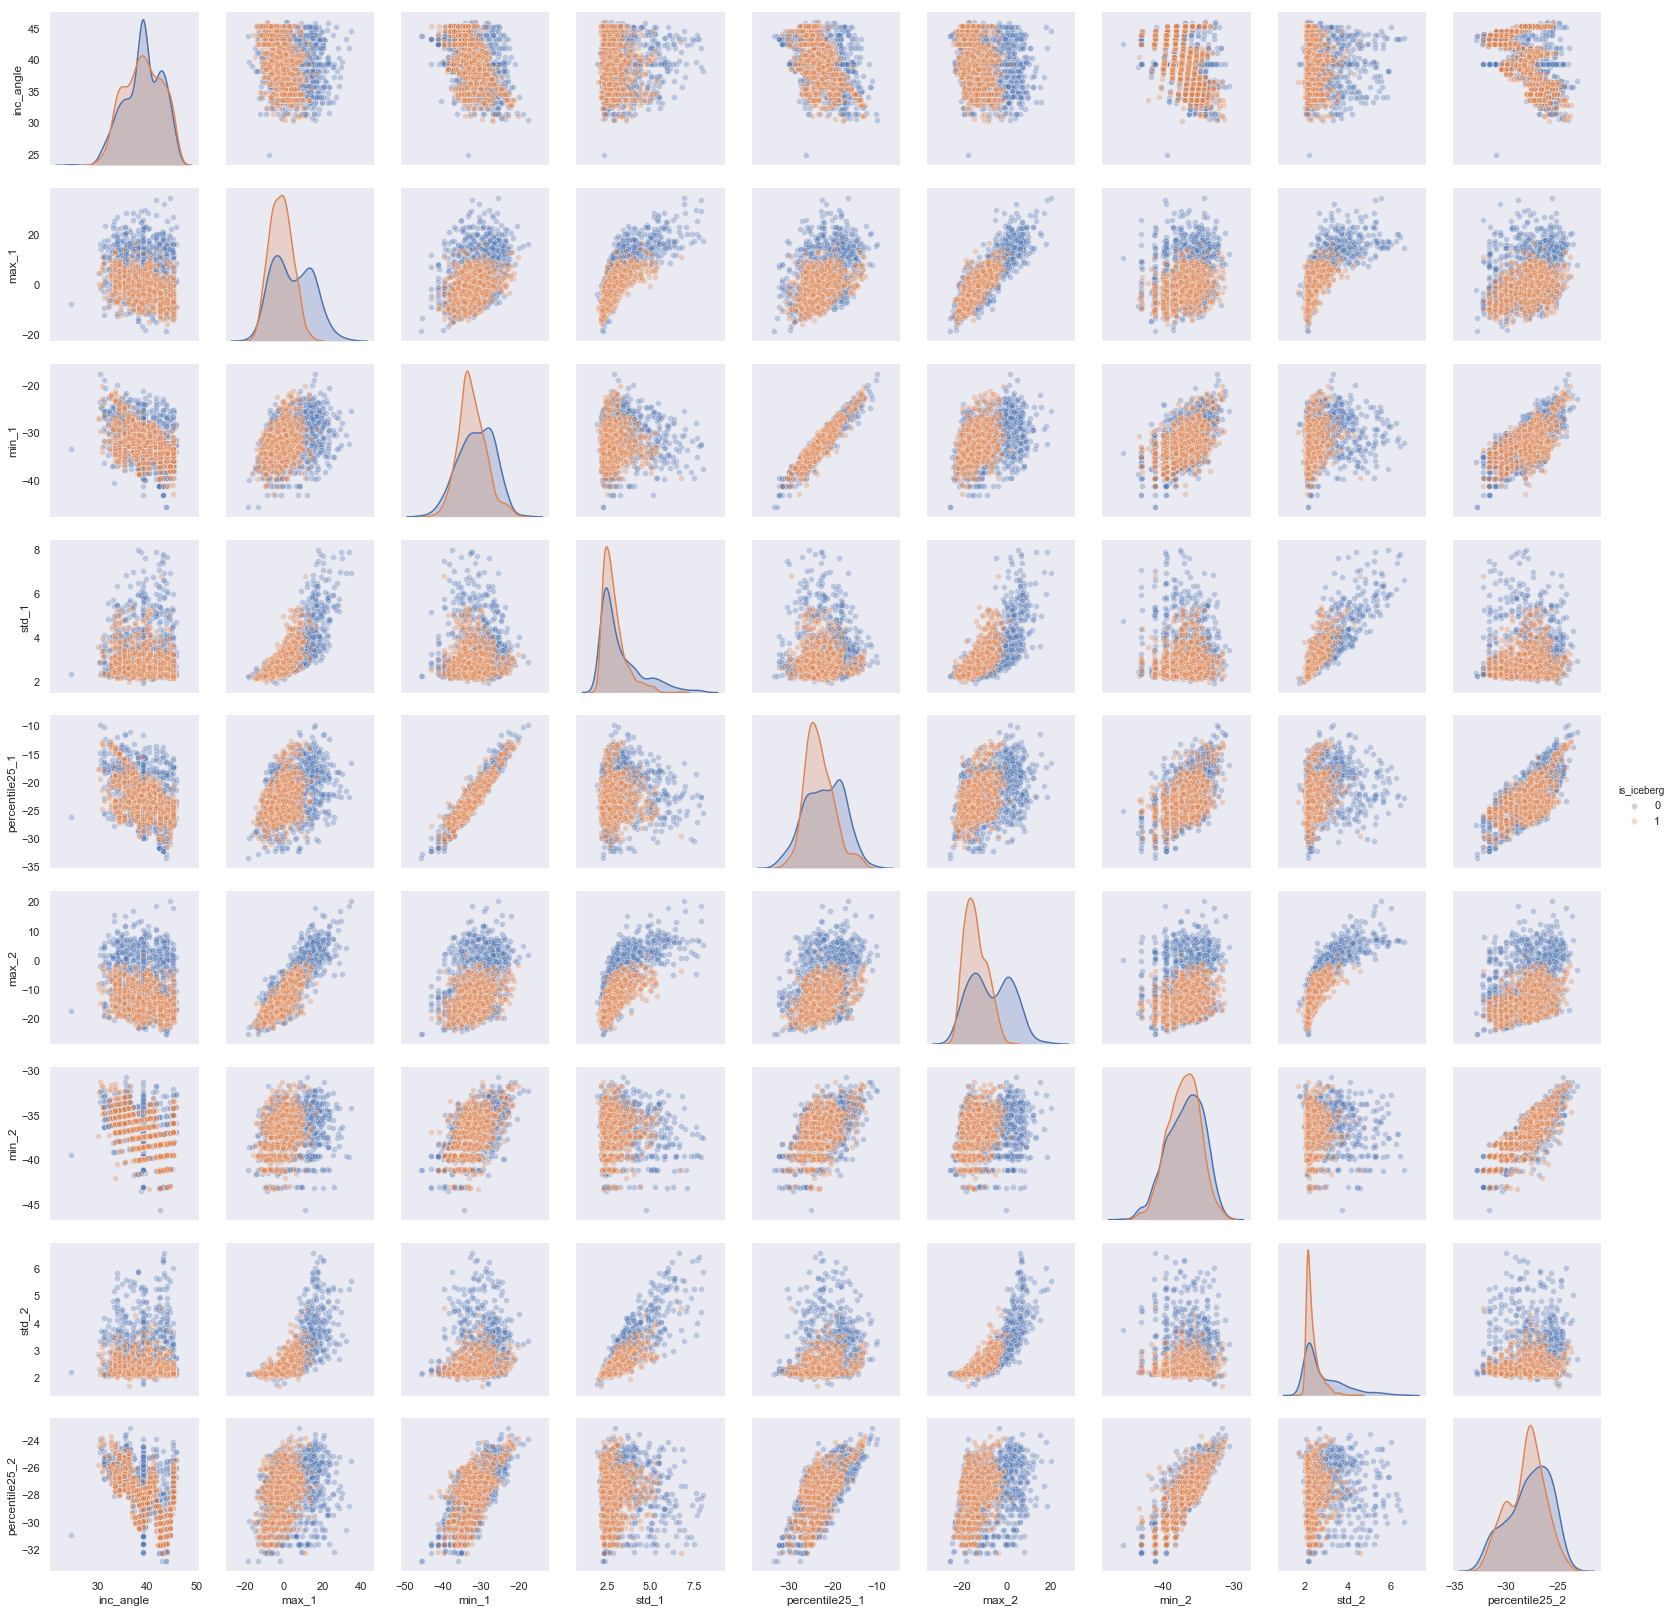

In [16]:
pairplot_cols = ['inc_angle', 'max_1', 'min_1', 'std_1', 'percentile25_1',
                              'max_2', 'min_2', 'std_2', 'percentile25_2']
sns.pairplot(hue='is_iceberg', data=data_train[pairplot_cols + ['is_iceberg']], vars=pairplot_cols,
             plot_kws={'alpha': 0.3})

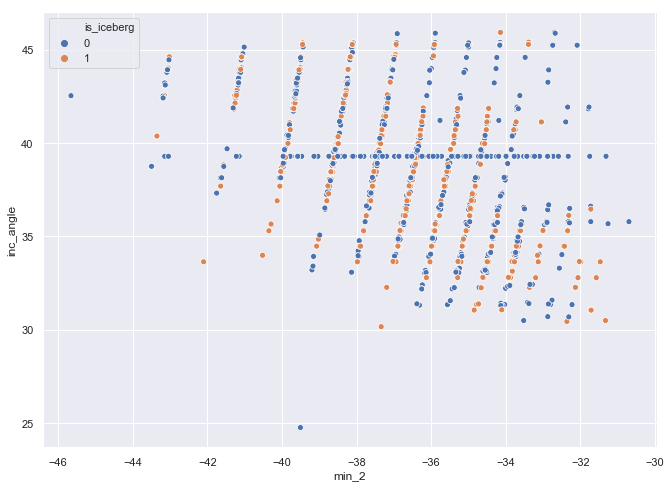

In [17]:
sns.set(rc={'figure.figsize': (11, 8)})
sns.scatterplot(x='min_2', y='inc_angle', hue='is_iceberg', data=data_train)

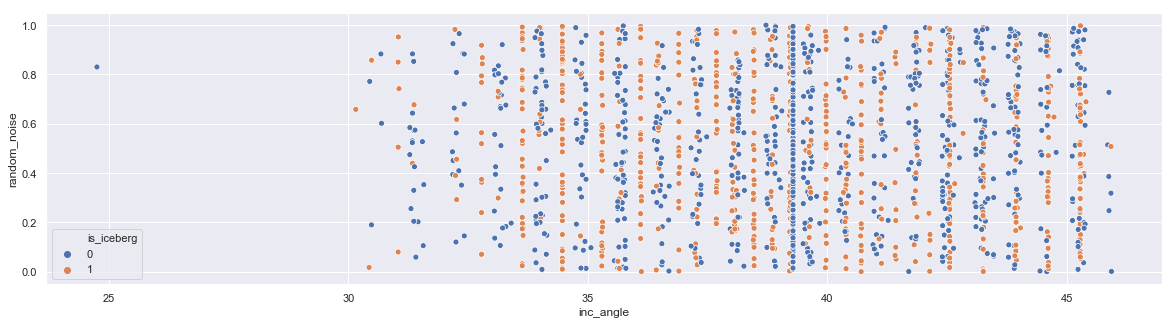

In [18]:
# Data leakage!
sns.set(rc={'figure.figsize': (20, 5)})
data_train['random_noise'] = np.random.random(data_train.shape[0])
sns.scatterplot(x='inc_angle', y='random_noise', hue='is_iceberg', data=data_train)

## plot images with different stats

In [19]:
plt.rcParams["axes.grid"] = False

def plot_images_with_increacing_stat(stat_name, data, is_iceberg, align, normalised=False):
    if is_iceberg:
        obj = 'Iceberg'
    else:
        obj = 'Ship'
    if stat_name[-1] == '1':
        band = "HH"
    else:
        band = "HV"
    plot_data = data[data.is_iceberg == is_iceberg]
    fig = plt.figure(1, figsize=(25, 5))
    fig.suptitle("Images with increasing {stat}\n{obj}\n{channel}".format(stat=stat_name[:-2],
                                                                          obj=obj, channel=band), fontsize=30)
    for i in np.arange(1, 10):
        data_chunk = plot_data[(plot_data[stat_name] > align[i-1]) & (plot_data[stat_name] <= align[i])]
        indexes = data_chunk.index.values
        k = np.random.choice(indexes)
        axis = fig.add_subplot(1, 9, i)
        arr = np.reshape(np.array(data.iloc[k, 0]), (75, 75))
        if normalised:
            axis.imshow(arr, cmap='gray')
        else:
            axis.imshow(arr, cmap='gray', vmin=plot_data['min_1'].min(), vmax=plot_data['max_1'].max())
        plt.xlabel("img: {} \n   {}: {:.4}".format(k, stat_name[:-2], data.loc[k, stat_name]))
    plt.show()

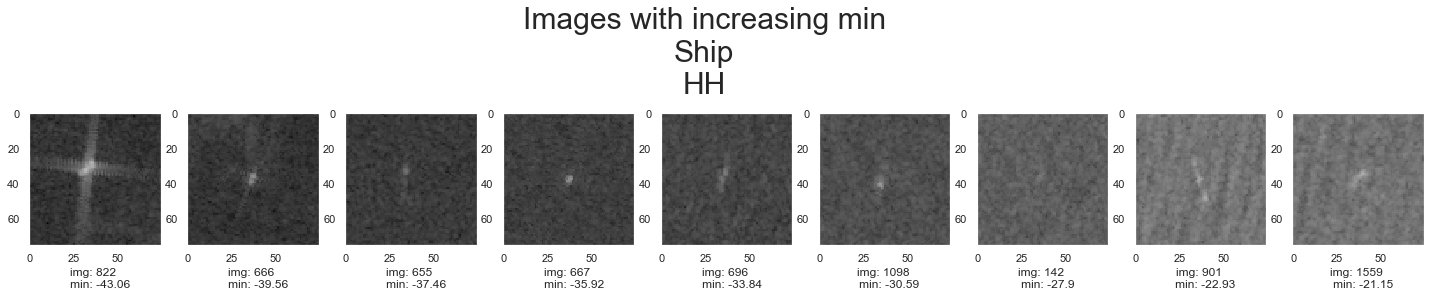

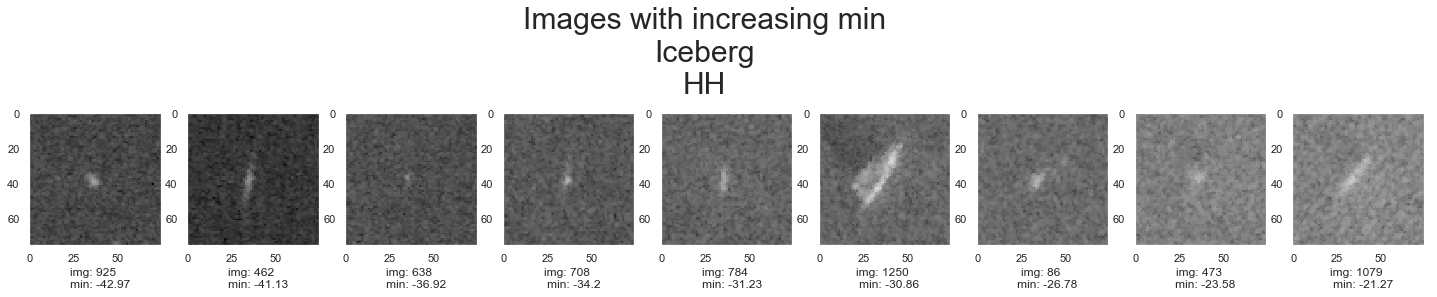

In [20]:
for is_iceberg in [0, 1]:
    plot_images_with_increacing_stat(stat_name="min_1", data=data_train, is_iceberg=is_iceberg,
                                     align=np.linspace(-45, -20, 10), normalised=False)

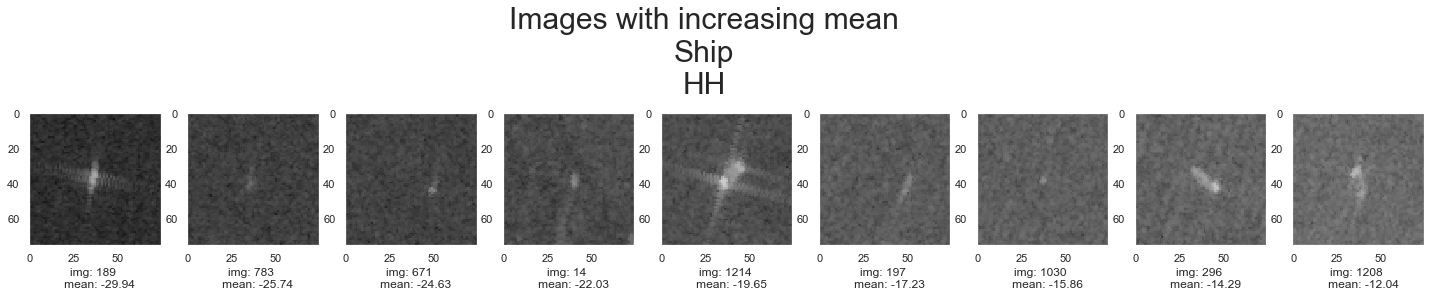

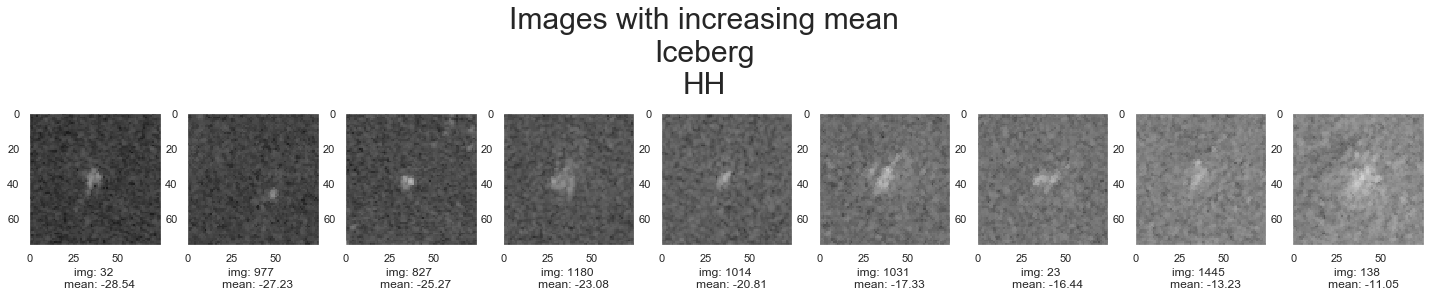

In [21]:
for is_iceberg in [0, 1]:
    plot_images_with_increacing_stat(stat_name="mean_1", data=data_train, is_iceberg=is_iceberg,
                                     align=np.linspace(-30, -10, 10), normalised=False)

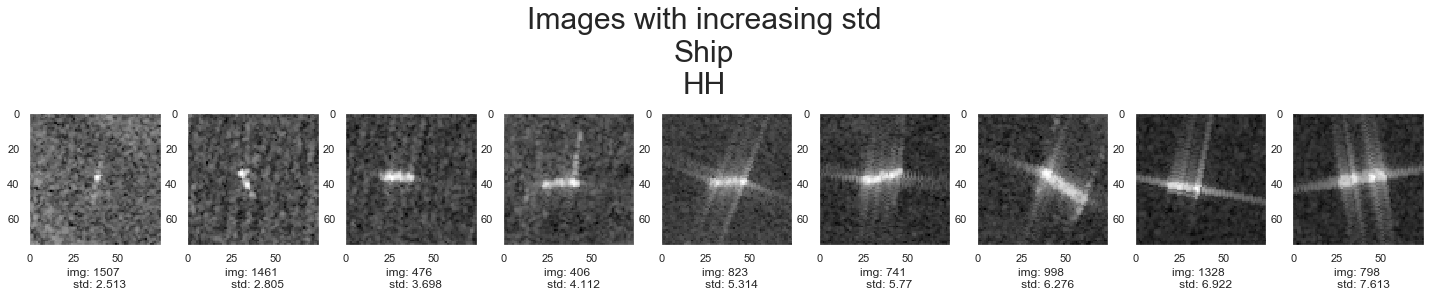

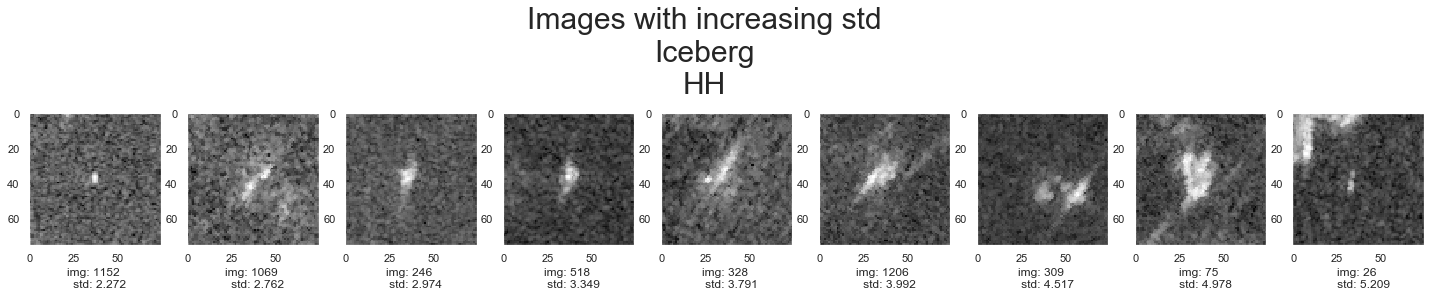

In [22]:
plot_images_with_increacing_stat(stat_name="std_1", data=data_train, is_iceberg=0,
                                 align=np.linspace(2, 8, 10), normalised=True)
plot_images_with_increacing_stat(stat_name="std_1", data=data_train, is_iceberg=1,
                                 align=np.linspace(2, 5.5, 10), normalised=True)

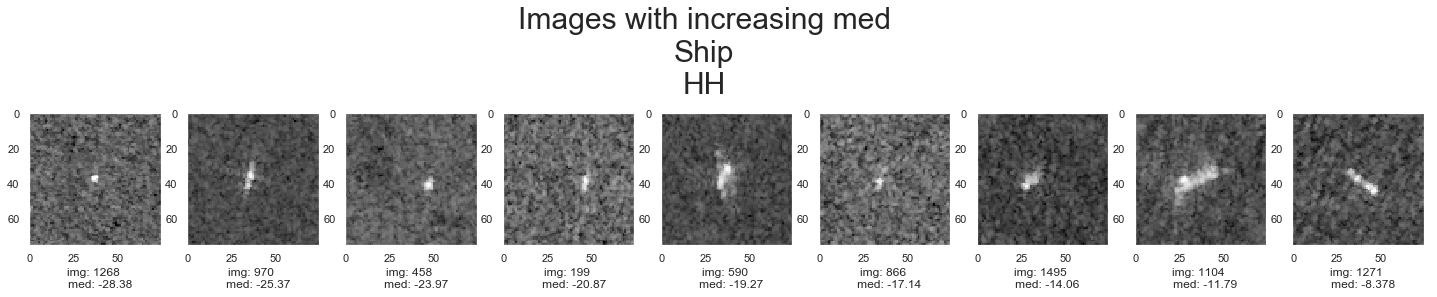

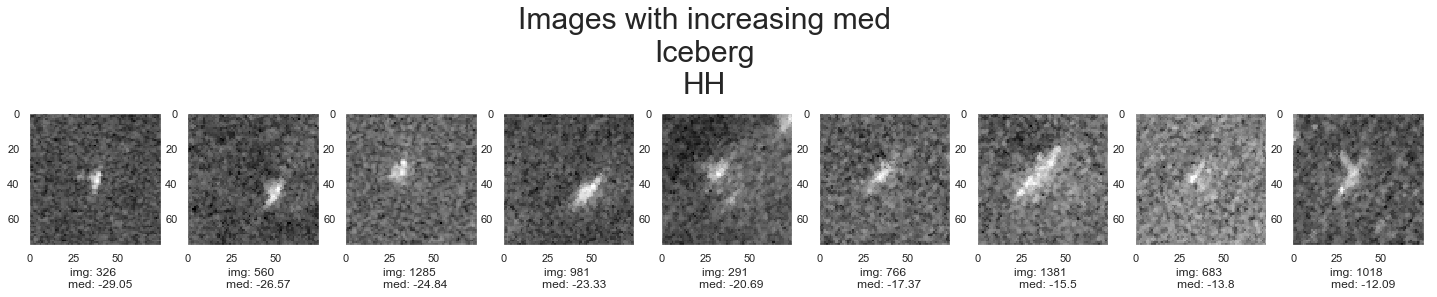

In [23]:
plot_images_with_increacing_stat(stat_name="med_1", data=data_train, is_iceberg=0,
                                 align=np.linspace(-30, -8, 10), normalised=True)
plot_images_with_increacing_stat(stat_name="med_1", data=data_train, is_iceberg=1,
                                 align=np.linspace(-30, -10, 10), normalised=True)

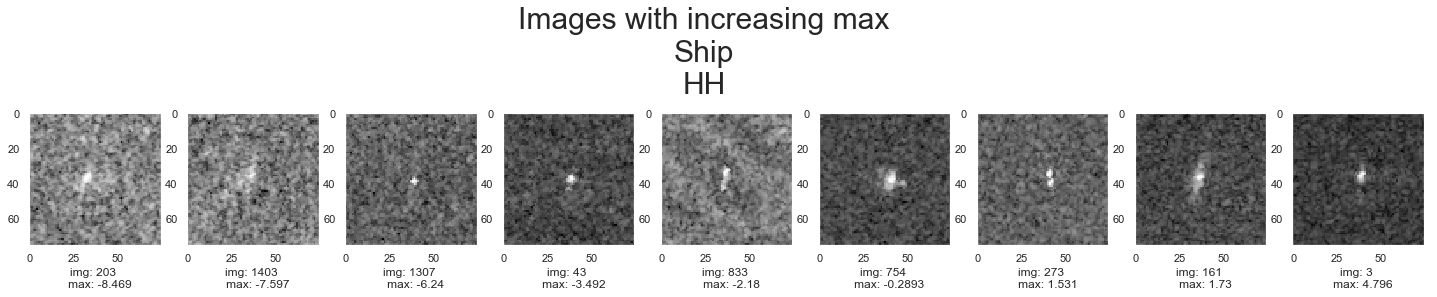

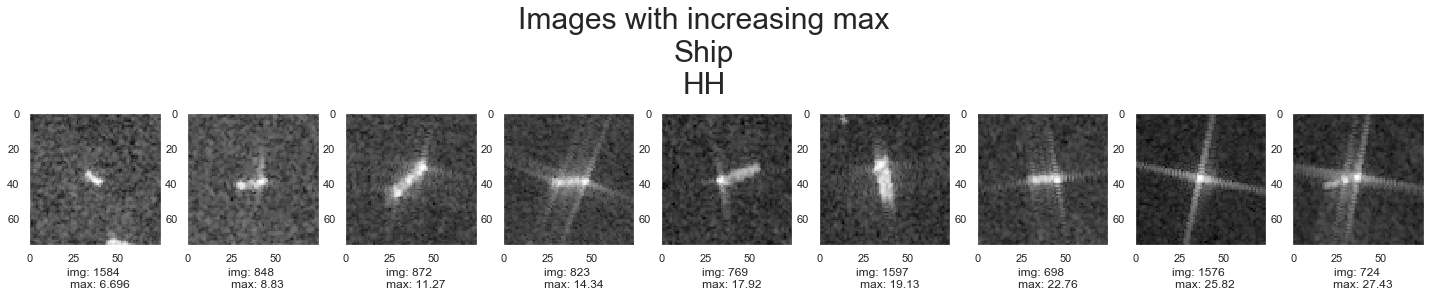

In [24]:
plot_images_with_increacing_stat(stat_name="max_1", data=data_train, is_iceberg=0,
                                 align=np.linspace(-10, 5, 10), normalised=True)
plot_images_with_increacing_stat(stat_name="max_1", data=data_train, is_iceberg=0,
                                 align=np.linspace(5, 30, 10), normalised=True)

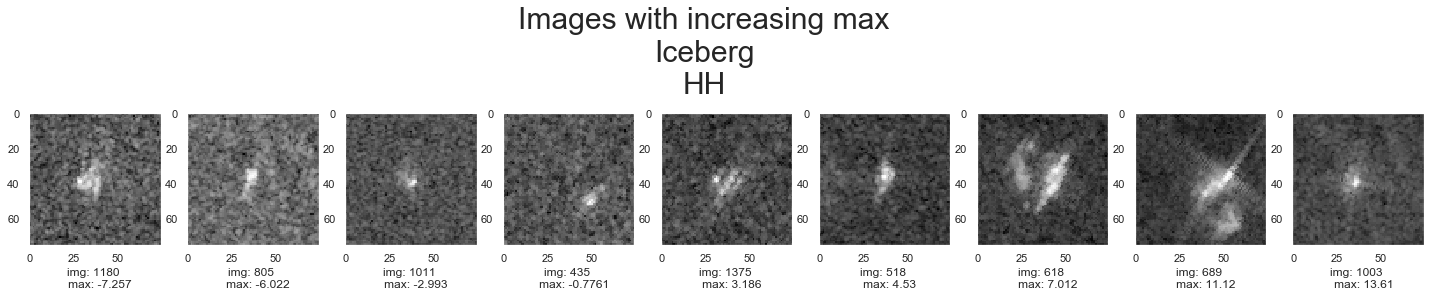

In [25]:
plot_images_with_increacing_stat(stat_name="max_1", data=data_train, is_iceberg=1,
                                 align=np.linspace(-10, 15, 10), normalised=True)